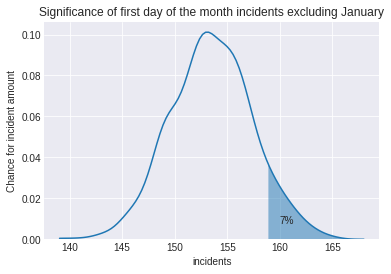

In [48]:
import pandas as pd
import numpy
import numpy as np

import scipy.stats as stats
from scipy.stats import norm

import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

df = pd.read_csv('../data/AllGunShootings.csv') 

df.insert(value = [kill + inj for kill, inj in zip(df['n_killed'], 
              df['n_injured'])], loc= df.shape[1], column = 'casualties')

casualties_num = 0
casualties = []
appender = False

for i in range(278, df.shape[0]):
    if int(df.iloc[i, 2][8:]) == 1 and not int(df.iloc[i,2][5:7]) == 1:
        casualties_num += 1
        appender = True
    elif appender == True and not int(df.iloc[i,2][5:7]) == 1:
        casualties.append(casualties_num)
        casualties_num = 0
        appender = False
        
alt_mean = numpy.mean(casualties)
real_mean = 153.45699896
real_std = 3.86416324419

dist = np.random.normal(real_mean, real_std, 1000)
kde = stats.gaussian_kde(dist)

# plot complete kde curve as line
pos = np.linspace(dist.min(), 168, 101)
plt.plot(pos, kde(pos))

# plot shaded kde only right of x=0.5
shade = np.linspace(alt_mean , 168, 101)
plt.fill_between(shade,kde(shade), alpha=0.5,)
plt.text(160, 0.0075, '7%')
plt.title('Significance of first day of the month incidents excluding January')
plt.xlabel('incidents')
plt.ylabel('Chance for incident amount')

plt.ylim(0,None)
plt.savefig(fname = 'analysis_incidents', dpi = 300)